In [6]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import KFold # import KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score, accuracy_score
from sklearn.feature_selection import SelectFromModel

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

import yellowbrick as yb

In [3]:
dataset_seattle = pd.read_csv('data1/dataset_seattle.csv')

In [16]:
dataset_fairbanks = pd.read_csv('data1/dataset_fairbanks.csv')

In [20]:
dataset_los_angeles = pd.read_csv('data1/dataset_los_angeles.csv')

## Seattle heatmap

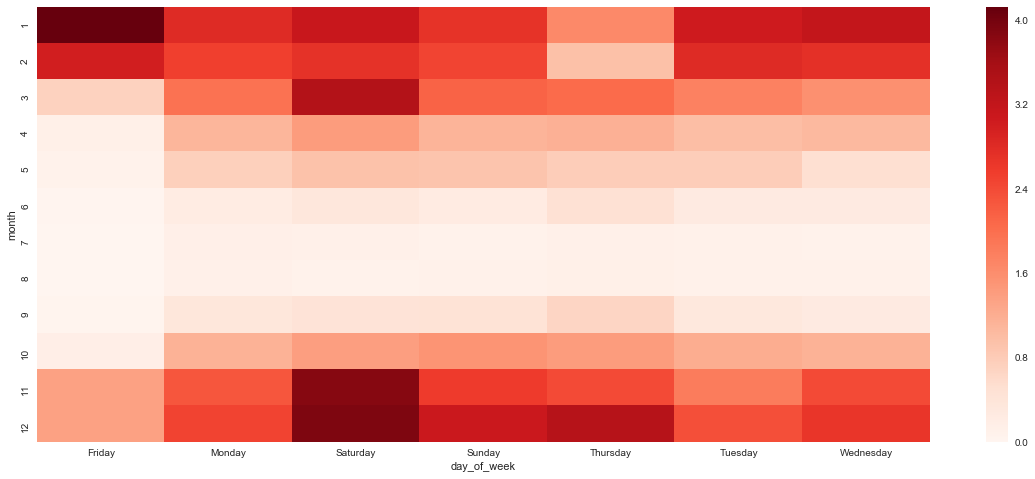

In [28]:
heatmap1_data = pd.pivot_table(dataset_seattle, values='Heating:Electricity [kW](Hourly)', 
                     index=['month'], 
                     columns='day_of_week')
plt.figure(figsize=(20, 8))
sns.heatmap(heatmap1_data, cmap="Reds")

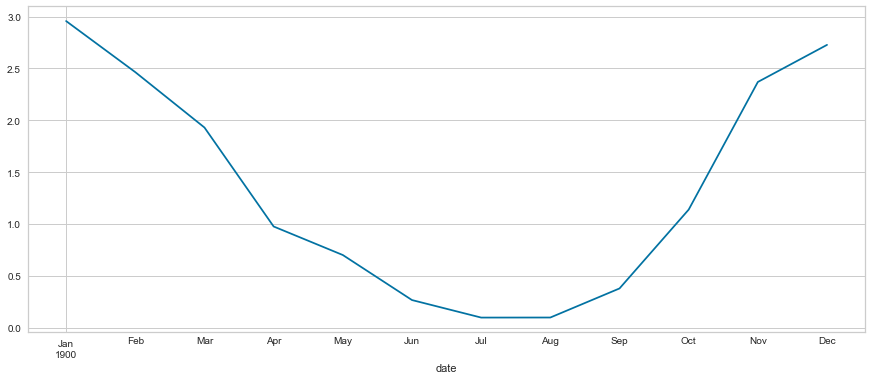

In [30]:
dataset_seattle['date'] = pd.to_datetime(dataset_seattle['Date'], format="%m/%d")
dataset_seattle_1 = dataset_seattle.groupby('date')['Heating:Electricity [kW](Hourly)'].sum().reset_index()
dataset_seattle_1 = dataset_seattle.set_index('date')
y = dataset_seattle_1['Heating:Electricity [kW](Hourly)'].resample('MS').mean()
y.plot(figsize=(15, 6))
plt.show()

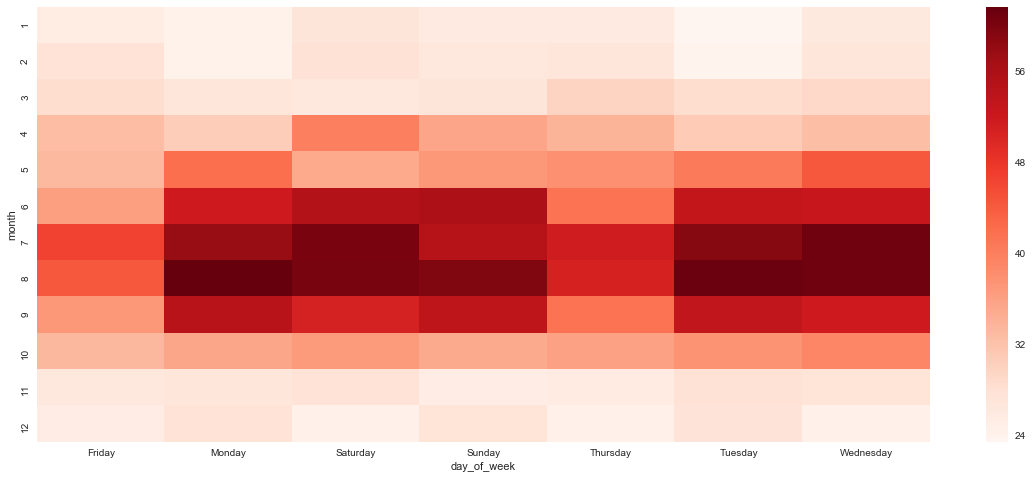

In [27]:
heatmap1_data = pd.pivot_table(dataset_seattle, values='Cooling:Electricity [kW](Hourly)', 
                     index=['month'], 
                     columns='day_of_week')
plt.figure(figsize=(20, 8))
sns.heatmap(heatmap1_data, cmap="Reds")

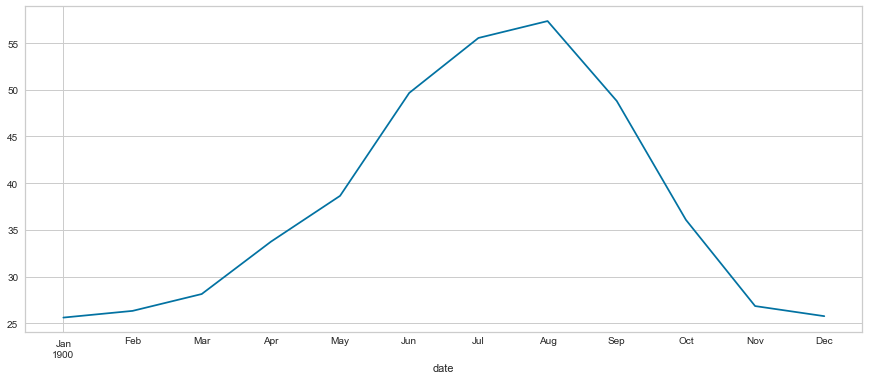

In [31]:
dataset_seattle['date'] = pd.to_datetime(dataset_seattle['Date'], format="%m/%d")
dataset_seattle_1 = dataset_seattle.groupby('date')['Cooling:Electricity [kW](Hourly)'].sum().reset_index()
dataset_seattle_1 = dataset_seattle.set_index('date')
y = dataset_seattle_1['Cooling:Electricity [kW](Hourly)'].resample('MS').mean()
y.plot(figsize=(15, 6))
plt.show()

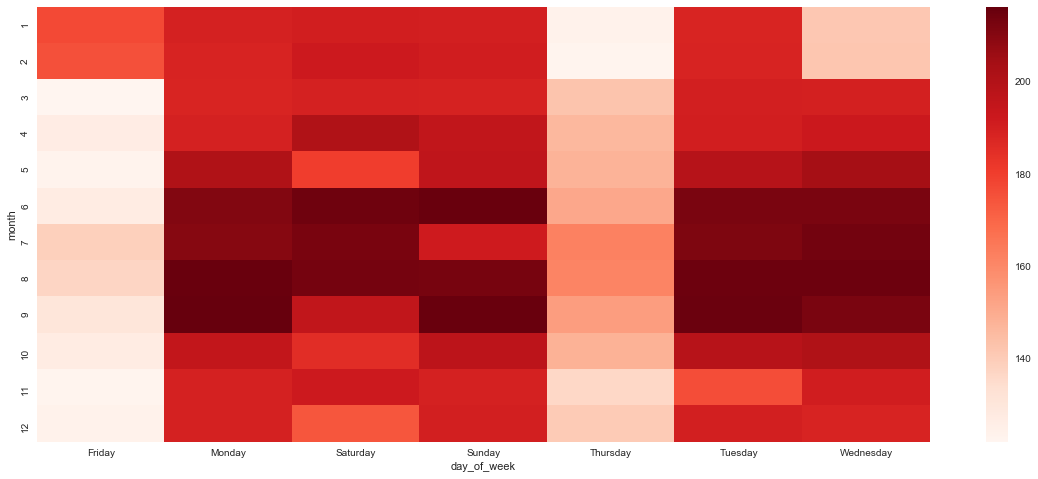

In [32]:
heatmap1_data = pd.pivot_table(dataset_seattle, values='Electricity:Facility [kW](Hourly)', 
                     index=['month'], 
                     columns='day_of_week')
plt.figure(figsize=(20, 8))
sns.heatmap(heatmap1_data, cmap="Reds")

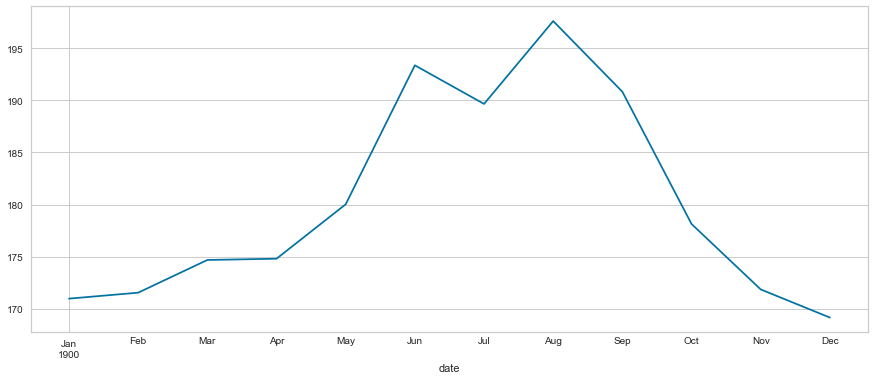

In [33]:
dataset_seattle['date'] = pd.to_datetime(dataset_seattle['Date'], format="%m/%d")
dataset_seattle_1 = dataset_seattle.groupby('date')['Electricity:Facility [kW](Hourly)'].sum().reset_index()
dataset_seattle_1 = dataset_seattle.set_index('date')
y = dataset_seattle_1['Electricity:Facility [kW](Hourly)'].resample('MS').mean()
y.plot(figsize=(15, 6))
plt.show()

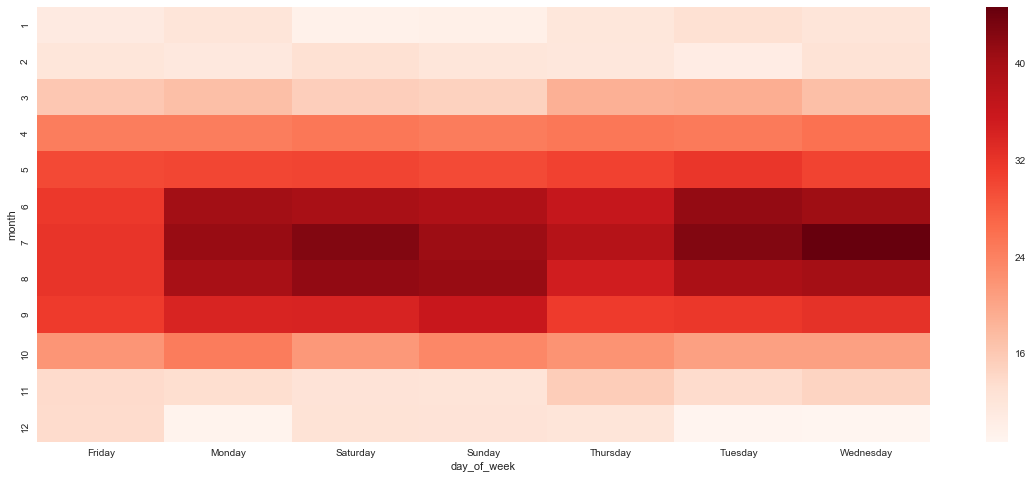

In [17]:
heatmap1_data = pd.pivot_table(dataset_fairbanks, values='Cooling:Electricity [kW](Hourly)', 
                     index=['month'], 
                     columns='day_of_week')
plt.figure(figsize=(20, 8))
sns.heatmap(heatmap1_data, cmap="Reds")

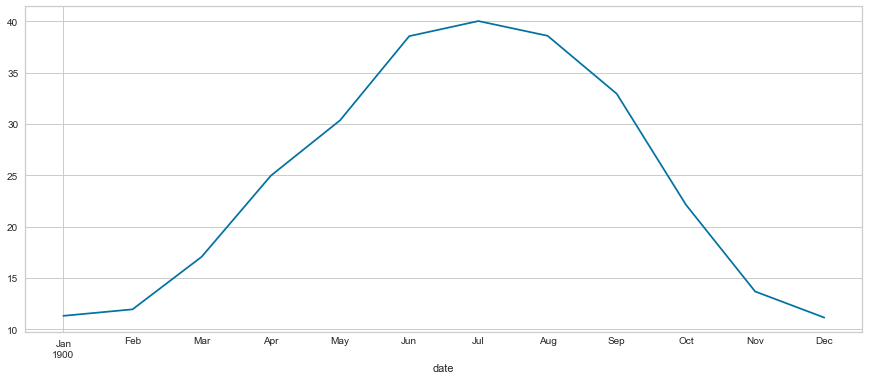

In [35]:
dataset_fairbanks['date'] = pd.to_datetime(dataset_fairbanks['Date'], format="%m/%d")
dataset_fairbanks_1 = dataset_fairbanks.groupby('date')['Cooling:Electricity [kW](Hourly)'].sum().reset_index()
dataset_fairbanks_1 = dataset_fairbanks.set_index('date')
y = dataset_fairbanks_1['Cooling:Electricity [kW](Hourly)'].resample('MS').mean()
y.plot(figsize=(15, 6))
plt.show()

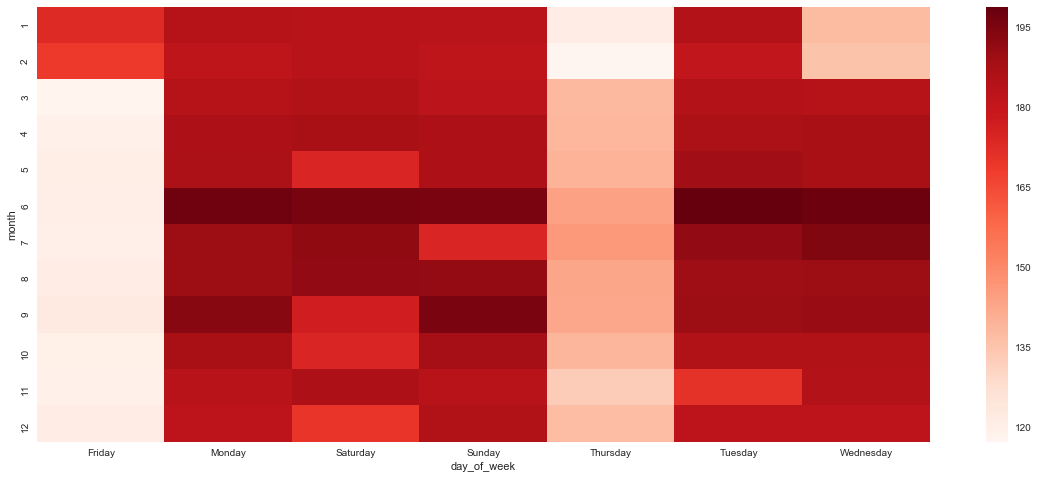

In [18]:
heatmap1_data = pd.pivot_table(dataset_fairbanks, values='Electricity:Facility [kW](Hourly)', 
                     index=['month'], 
                     columns='day_of_week')
plt.figure(figsize=(20, 8))
sns.heatmap(heatmap1_data, cmap="Reds")

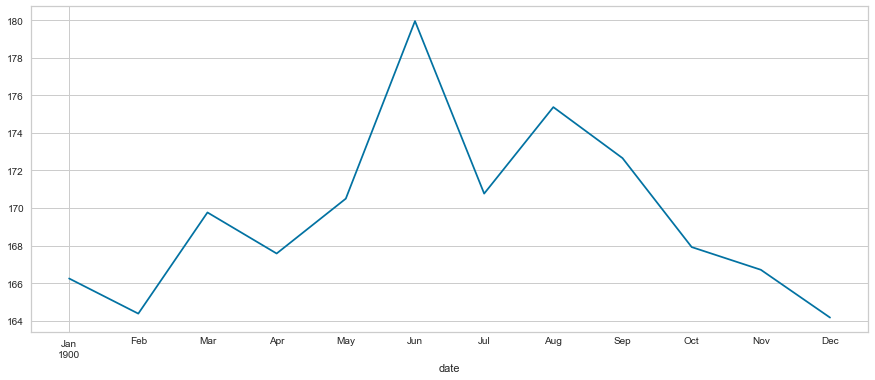

In [36]:
dataset_fairbanks['date'] = pd.to_datetime(dataset_fairbanks['Date'], format="%m/%d")
dataset_fairbanks_1 = dataset_fairbanks.groupby('date')['Electricity:Facility [kW](Hourly)'].sum().reset_index()
dataset_fairbanks_1 = dataset_fairbanks.set_index('date')
y = dataset_fairbanks_1['Electricity:Facility [kW](Hourly)'].resample('MS').mean()
y.plot(figsize=(15, 6))
plt.show()

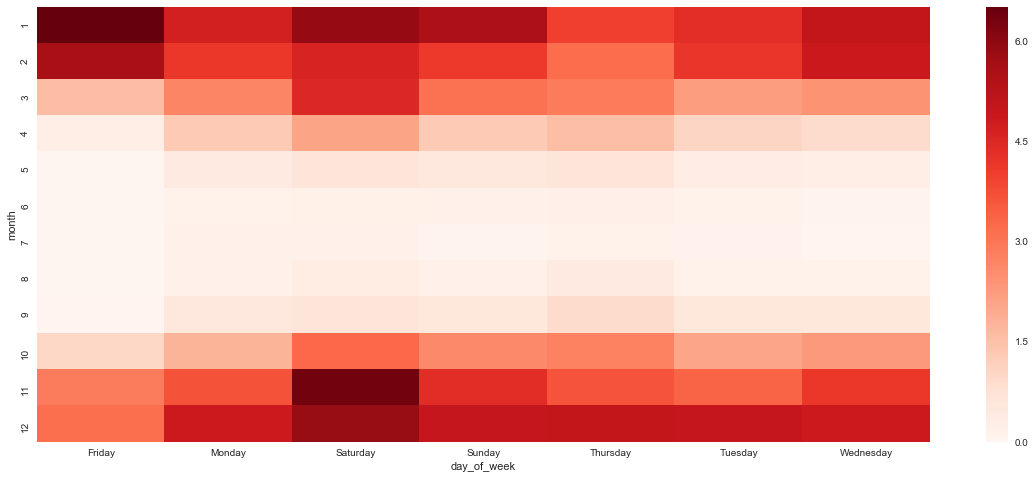

In [19]:
heatmap1_data = pd.pivot_table(dataset_fairbanks, values='Heating:Electricity [kW](Hourly)', 
                     index=['month'], 
                     columns='day_of_week')
plt.figure(figsize=(20, 8))
sns.heatmap(heatmap1_data, cmap="Reds")

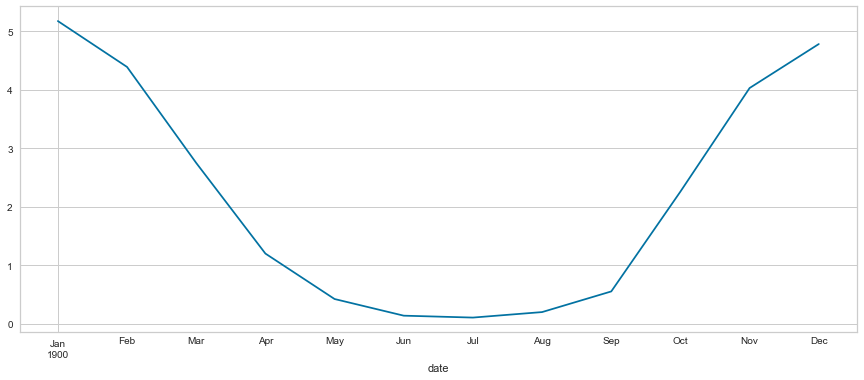

In [37]:
dataset_fairbanks['date'] = pd.to_datetime(dataset_fairbanks['Date'], format="%m/%d")
dataset_fairbanks_1 = dataset_fairbanks.groupby('date')['Heating:Electricity [kW](Hourly)'].sum().reset_index()
dataset_fairbanks_1 = dataset_fairbanks.set_index('date')
y = dataset_fairbanks_1['Heating:Electricity [kW](Hourly)'].resample('MS').mean()
y.plot(figsize=(15, 6))
plt.show()

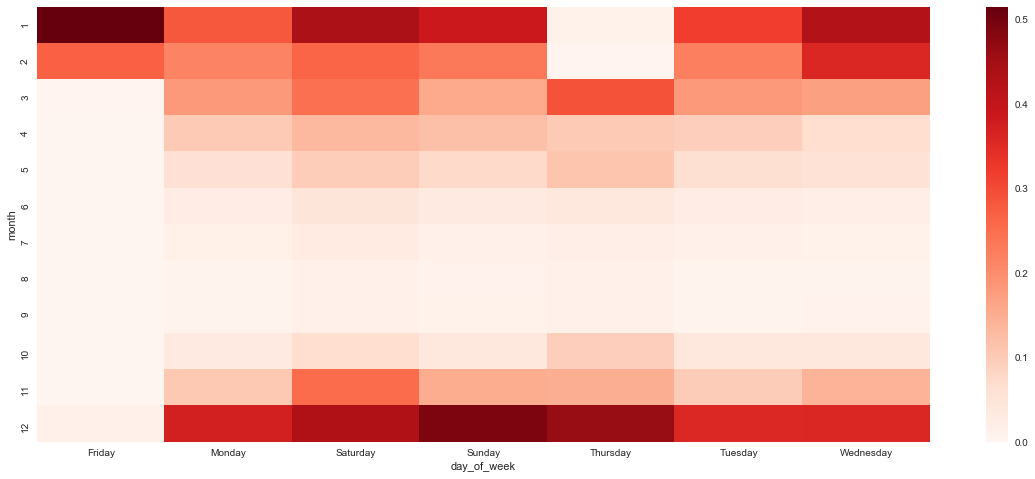

In [22]:
heatmap1_data = pd.pivot_table(dataset_los_angeles, values='Heating:Electricity [kW](Hourly)', 
                     index=['month'], 
                     columns='day_of_week')
plt.figure(figsize=(20, 8))
sns.heatmap(heatmap1_data, cmap="Reds")

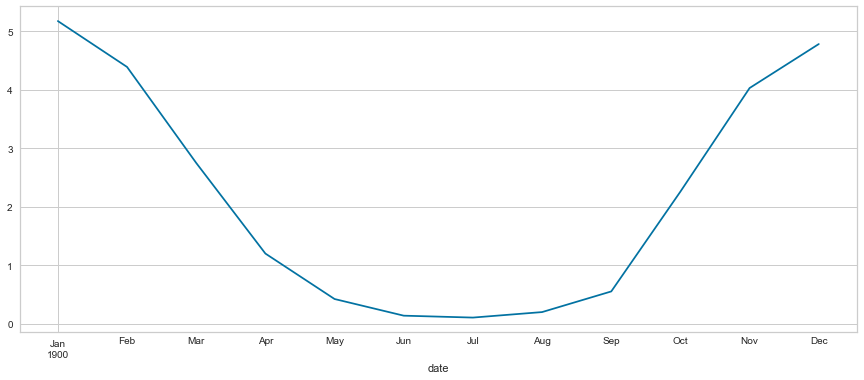

In [38]:
dataset_los_angeles['date'] = pd.to_datetime(dataset_los_angeles['Date'], format="%m/%d")
dataset_los_angeles_1 = dataset_los_angeles.groupby('date')['Heating:Electricity [kW](Hourly)'].sum().reset_index()
dataset_los_angeles_1 = dataset_los_angeles.set_index('date')
y = dataset_fairbanks_1['Heating:Electricity [kW](Hourly)'].resample('MS').mean()
y.plot(figsize=(15, 6))
plt.show()

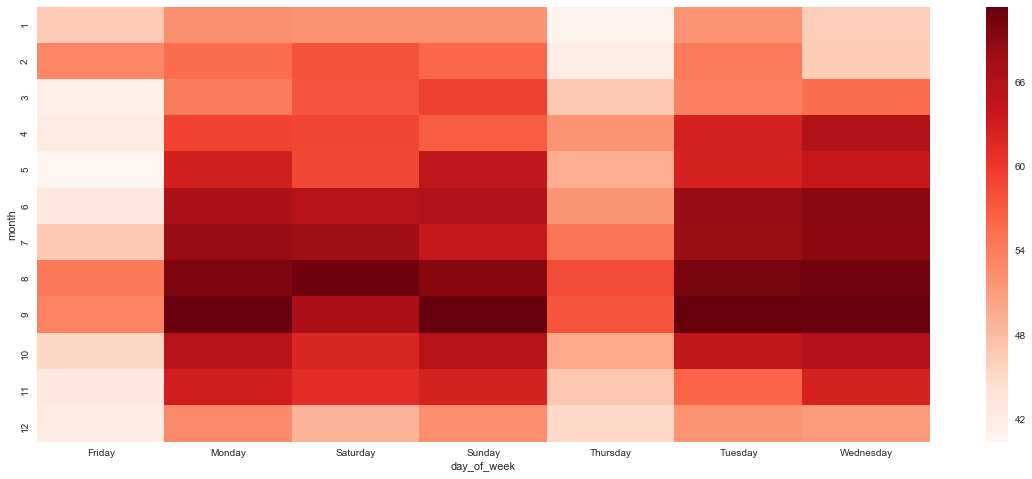

In [23]:
heatmap1_data = pd.pivot_table(dataset_los_angeles, values='Cooling:Electricity [kW](Hourly)', 
                     index=['month'], 
                     columns='day_of_week')
plt.figure(figsize=(20, 8))
sns.heatmap(heatmap1_data, cmap="Reds")

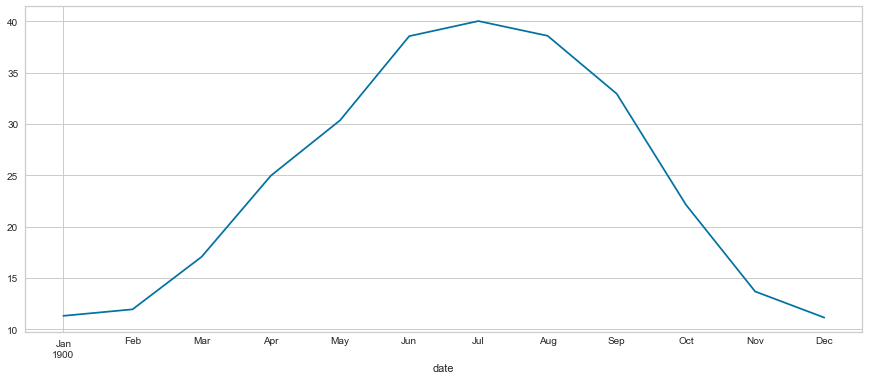

In [39]:
dataset_los_angeles['date'] = pd.to_datetime(dataset_los_angeles['Date'], format="%m/%d")
dataset_los_angeles_1 = dataset_los_angeles.groupby('date')['Cooling:Electricity [kW](Hourly)'].sum().reset_index()
dataset_los_angeles_1 = dataset_los_angeles.set_index('date')
y = dataset_fairbanks_1['Cooling:Electricity [kW](Hourly)'].resample('MS').mean()
y.plot(figsize=(15, 6))
plt.show()

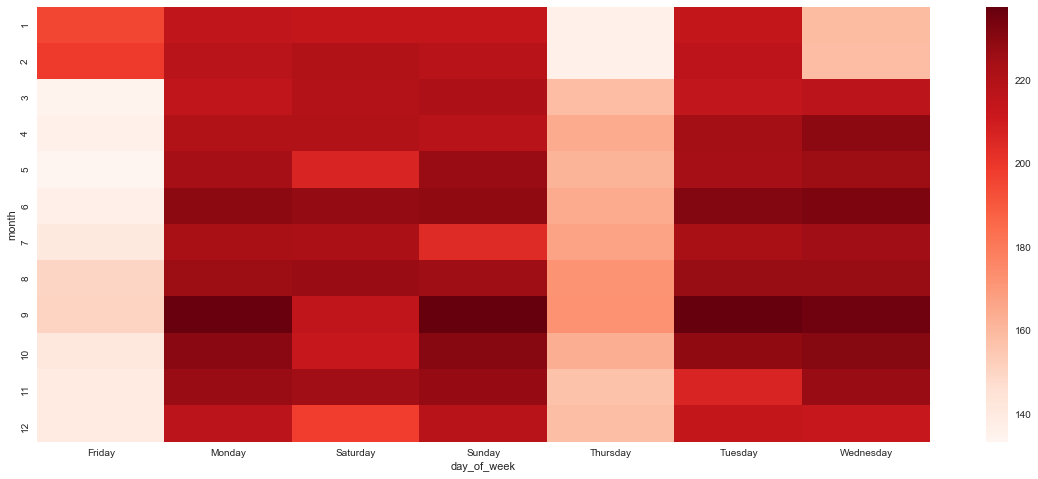

In [24]:
heatmap1_data = pd.pivot_table(dataset_los_angeles, values='Electricity:Facility [kW](Hourly)', 
                     index=['month'], 
                     columns='day_of_week')
plt.figure(figsize=(20, 8))
sns.heatmap(heatmap1_data, cmap="Reds")

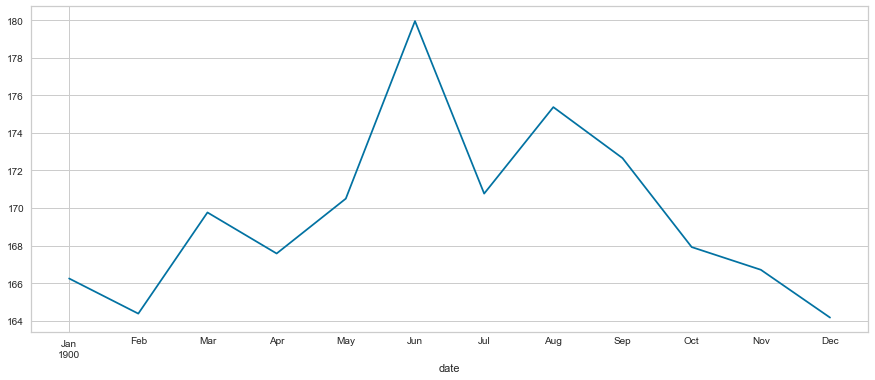

In [40]:
dataset_los_angeles['date'] = pd.to_datetime(dataset_los_angeles['Date'], format="%m/%d")
dataset_los_angeles_1 = dataset_los_angeles.groupby('date')['Electricity:Facility [kW](Hourly)'].sum().reset_index()
dataset_los_angeles_1 = dataset_los_angeles.set_index('date')
y = dataset_fairbanks_1['Electricity:Facility [kW](Hourly)'].resample('MS').mean()
y.plot(figsize=(15, 6))
plt.show()